# LangGraph Labs
## Graph 1
### Can we create a StateGraph without a State Variable

In [2]:
from langgraph.graph import StateGraph 

In [3]:
graph = StateGraph()

ValueError: Must provide state_schema or input and output

we are getting an `ValueError`, with a warning which basically says "Initializing `StateGraph` without `state_schema` is depcrecated.". Which means we must provide a *State Variable*, to create a `StateGraph` instance. 

Now let us do that. 

Let us import `TypeDict` and `Dict` modules from `typing` library and define a new *class*. 

In [4]:
from typing import Dict, TypedDict
# Defining a state schema for the agent

class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

graph = StateGraph(AgentState)

Right, now I can see that the `StateGraph` instance got created. Now let us try to add the nodes. 

In [ ]:
from typing import Dict, TypedDict
# Defining a state schema for the agent

class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

graph = StateGraph(AgentState)
graph.add_node(node="greet",action=lambda x : print('Welcome to LangGraph!'))
graph.set_entry_point("greet")
graph.set_finish_point("greet")

app = graph.compile()



In [10]:
result = app.invoke()
print(result)

TypeError: Pregel.invoke() missing 1 required positional argument: 'input'

Right, looks like the *Graph* is expecting an input variable while getting *invoked*. Let me try to give an empty *dictionary*

In [11]:
result = app.invoke({})
print(result)

Welcome to LangGraph!
None


That worked. But we can see that the `result` was `None`, which means the *Graph* just printed the greeting message, and that's all. 

Now, if I want to have a little complex action, then let me see what I can do. Well what I found is that I can define a simple python function and provide that as the *action* of the *node*. 

Let me try to do that now. 

In [ ]:
from typing import Dict, TypedDict
# Defining a state schema for the agent

class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

# Defining a greeting node 
def greeting_node(input_check) -> None:
    """Simple node that greets a user"""
    print(f'Given Input from the Graph: \n{input_check}\n\n')
    print("Hello! Welcome to LangGraph.")

graph = StateGraph(AgentState) # Trying to define the StateGraph without a State Schema
graph.add_node("greeting_node", greeting_node)  # Adding the greeting node to the 
graph.set_entry_point("greeting_node")  # Setting the entry point to the greeting node : graph.add_edge(START, "greeting")
graph.set_finish_point("greeting_node")  # Setting the finish point to the greeting node : graph.add_edge("greeting", END)

# Compiling the graph
app = graph.compile()



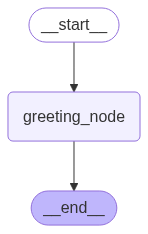

In [8]:
from IPython.display import display, Image 
display( Image(
    app.get_graph().draw_mermaid_png()
))

I was able to compile the `StateGraph`, and I can see the structure above. Let us now try to *invoke* the *compiled* `StateGraph` instance (`app`). 

In [5]:
app.invoke()

TypeError: Pregel.invoke() missing 1 required positional argument: 'input'

Now I am getting an error. Its saying when we `invoke` the *graph* we should give an *input*. I wanted to see what is this is *input* which the *graph* is expecting. 

I know that an empty dictionary was accepted last time. But that's of no use. Let me try to give some kind of valid input this time. 

Is it the *State* or will it accept any general variable as the *input*. Lets try to input a *dictionary* type variable which is different to the *State Schema*. 

In [9]:
input = { 'check_input': 'This is a test input' } # This is not similar to the State Schema defined above

app.invoke(input)  


Given Input from the Graph: 
{}


Hello! Welcome to LangGraph.


Ok, I was able to see that the *Graph* ran, but looks like the behavior is a little different to what we expected. We can see the outputs of the `greeting_node`. Looks like the input which we gave didn't get passed into the `greeting_node`. That's why we see an *empty dictionary* in the output. We can see that the `greeting_node` was executed. 

Now let me try to give an input in *dictionary* format, which is similar to *State Schema*. 

In [10]:
input2 = { 'greeting': 'This is a test input' } # This is similar to the State Schema defined above
app.invoke(input2)  # This should work as the input matches the state schema

Given Input from the Graph: 
{'greeting': 'This is a test input'}


Hello! Welcome to LangGraph.


{'greeting': 'This is a test input'}

Great. It worked. I now see that the `greeting_node` received the input which I gave when I *invoked* the *graph*. The `greeting_node` was able to access the variable and print it. So what I can conclude with this. 

## Summary
+ Creating an instance of a `StateGraph` requires a *State Schema* type variable as an *input*
+ Each *node function* should accept a variable. But if we want to make use of the input given to the *Graph* then the *node function* should accept a *State Schema* type variable as the input. 